<a href="https://colab.research.google.com/github/Mohan-Koruprolu/Machine-Learning/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the names file from this github

In [ ]:
!git clone https://github.com/karpathy/makemore.git

fatal: destination path 'makemore' already exists and is not an empty directory.


In [ ]:
words=open("makemore/names.txt","r").read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

**Bigram character Model**

In [ ]:
b={}
for w in words :
  chs=["<S>"]+list(w)+['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    b[bigram]=b.get(bigram,0)+1


In [ ]:
sorted(b.items(),key=lambda kv:kv[1],reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch

In [ ]:
N=torch.zeros((27,27),dtype=torch.int32)

In [ ]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi["."]=0
itos={i:s for s,i in stoi.items()}

In [ ]:
for w in words :
  chs=["."]+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
     ix1=stoi[ch1]
     ix2=stoi[ch2]
     N[ix1,ix2]+=1

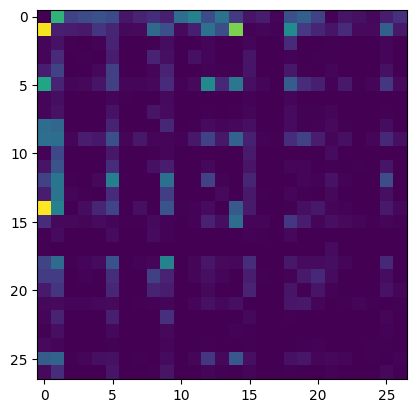

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(N)

In [ ]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
p=N[0].float()

In [ ]:
P=N.float()
P=P/P.sum(1,keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [ ]:
g=torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p,num_samples=10,replacement=True,generator=g)
a=[]
for i in ix:
  a.append(itos[i.item()])
a

['m', 's', 'n', 'a', 'a', 't', 't', 'a', 'm', 'm']

In [ ]:
g=torch.Generator().manual_seed(2147483647)
for i in range(10):
  ix=0
  out=[]
  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break
  print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [ ]:
for w in words[:3] :
  chs=["."]+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
     ix1=stoi[ch1]
     ix2=stoi[ch2]
     prob=P[ix1,ix2]
     print(f" {ch1}{ch2} : {prob:.4f}")


 .e : 0.0478
 em : 0.0377
 mm : 0.0253
 ma : 0.3899
 a. : 0.1960
 .o : 0.0123
 ol : 0.0780
 li : 0.1777
 iv : 0.0152
 vi : 0.3541
 ia : 0.1381
 a. : 0.1960
 .a : 0.1377
 av : 0.0246
 va : 0.2495
 a. : 0.1960
